In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from glob import glob
import xarray as xr
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
import numpy as np
import cmocean

## Set observational paths

In [3]:
oisst_dir = '/uda/NCEI_OISST/AVHRR-only/v2.1/'

## Get file list

In [12]:
filelistOISST = glob(f'{oisst_dir}/*/oisst-avhrr-v02r01.200*.nc')

## Read in observational data

In [15]:
DS_oisst = xr.open_mfdataset(filelistOISST,engine='netcdf4')

In [33]:
DS_oisst

,Array,Chunk
Bytes,15.15 GB,4.15 MB
Shape,"(3653, 1, 720, 1440)","(1, 1, 720, 1440)"
Count,10959 Tasks,3653 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,15.15 GB,4.15 MB
Shape,"(3653, 1, 720, 1440)","(1, 1, 720, 1440)"
Count,10959 Tasks,3653 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [23]:
SST = DS_oisst.sst.groupby('time.month').mean().sel(month=9,lat=slice(60,90))

In [25]:
import cartopy.crs as ccrs
import copy
import matplotlib.cm as cm
import matplotlib.path as mpath
import cartopy.feature as cfeature

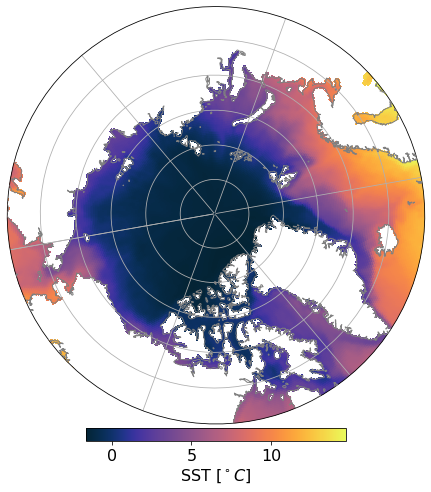

In [32]:
fig,ax = plt.subplots(figsize=(8,8),subplot_kw={'projection':ccrs.NorthPolarStereo(central_longitude=-100)})
    
cmap = copy.copy('cmo.thermal')
ax.set_extent([-180, 180, 60, 90], ccrs.PlateCarree())

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

im=ax.pcolormesh(SST["lon"],SST["lat"],SST.squeeze(),cmap=cmap,transform=ccrs.PlateCarree())

plt.colorbar(im,ax=ax,
             orientation='horizontal',
             fraction=0.03,pad=0.01,
             label='SST [$^\circ C$]')

ax.add_feature(cfeature.COASTLINE,zorder=10,color='gray')
ax.gridlines()
plt.show()